In [1]:
!pip install emoji

thinc 6.10.3 requires msgpack<1.0.0,>=0.5.6, which is not installed.
msgpack-numpy 0.4.4.3 requires msgpack>=0.5.2, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
spacy 2.0.13 has requirement msgpack-numpy<0.29,<0.4.4.0murmurhash>=0.28, but you'll have msgpack-numpy 0.4.4.3 which is incompatible.
spacy 2.0.13 has requirement regex==2018.01.10, but you'll have regex 2017.11.9 which is incompatible.
jupyterlab-server 1.0.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install wordcloud

thinc 6.10.3 requires msgpack<1.0.0,>=0.5.6, which is not installed.
msgpack-numpy 0.4.4.3 requires msgpack>=0.5.2, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
spacy 2.0.13 has requirement msgpack-numpy<0.29,<0.4.4.0murmurhash>=0.28, but you'll have msgpack-numpy 0.4.4.3 which is incompatible.
spacy 2.0.13 has requirement regex==2018.01.10, but you'll have regex 2017.11.9 which is incompatible.
jupyterlab-server 1.0.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import emoji
import regex as re
from emoji import get_emoji_regexp as ger
from wordcloud import WordCloud

In [4]:
#data = pd.read_csv("Dove_Body_Wash_Pump.csv",index_col = None,encoding = "utf-8")
data = pd.read_json('reviews.json',encoding = "utf-8")

In [5]:
#data = data.drop("Unnamed: 0",axis = 1)

In [6]:
data.head()

,body
0,Great value for you're money! I can't believe ...
1,NOT A FAKE. At least not the bottle I got. I r...
2,I first tried this wash at a relative’s home e...
3,I love this product. My husband somehow goes t...
4,Buy it! My old body wash (different brand) bro...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 1 columns):
body    4990 non-null object
dtypes: object(1)
memory usage: 39.1+ KB


In [8]:
duplicate = data[data.duplicated()].any().sum()
  
print("Duplicate Rows :")
duplicate

Duplicate Rows :


1

In [9]:
import numpy as np
data = data.replace(np.nan, 'No reviews', regex=True)

In [10]:
data.isna().any().sum()

0

In [11]:
rows_with_nan = [index for index, row in data.iterrows() if row.isnull().any()]
print(rows_with_nan)

[]


# Text_preprocessing:


In [12]:
# printing some random reviews
print(data['body'].values[0])
print("="*50)
print(data['body'].values[150])
print("="*50)
print(data['body'].values[1000])
print("="*50)
print(data['body'].values[200])
print("="*50)
print(data['body'].values[929])
print("="*50)

Great value for you're money! I can't believe I paid $9 for this! It'll probably last me all year, or almost the whole year.... coming from a 107 pound girl. & my hubby will be using it too. Nice to have body wash, & basically face wash all in 1. Fast shipping, thank you!!! Can't believe ppl are actually trying to sell this for $28 that's horrible!!! Just like ppl selling disinfectant products for $100 it's a horrible world we're living in.
Great value for you're money! I can't believe I paid $9 for this! It'll probably last me all year, or almost the whole year.... coming from a 107 pound girl. & my hubby will be using it too. Nice to have body wash, & basically face wash all in 1. Fast shipping, thank you!!! Can't believe ppl are actually trying to sell this for $28 that's horrible!!! Just like ppl selling disinfectant products for $100 it's a horrible world we're living in.
Great value for you're money! I can't believe I paid $9 for this! It'll probably last me all year, or almost t

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(data['body'].values[1000])
print(sent)
print("="*50)

Great value for you are money! I can not believe I paid $9 for this! It will probably last me all year, or almost the whole year.... coming from a 107 pound girl. & my hubby will be using it too. Nice to have body wash, & basically face wash all in 1. Fast shipping, thank you!!! Ca not believe ppl are actually trying to sell this for $28 that is horrible!!! Just like ppl selling disinfectant products for $100 it is a horrible world we are living in.


In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Great value for you are money! I can not believe I paid $9 for this! It will probably last me all year, or almost the whole year.... coming from a 107 pound girl. & my hubby will be using it too. Nice to have body wash, & basically face wash all in 1. Fast shipping, thank you!!! Ca not believe ppl are actually trying to sell this for $28 that is horrible!!! Just like ppl selling disinfectant products for $100 it is a horrible world we are living in.


In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Great value for you are money I can not believe I paid 9 for this It will probably last me all year or almost the whole year coming from a 107 pound girl my hubby will be using it too Nice to have body wash basically face wash all in 1 Fast shipping thank you Ca not believe ppl are actually trying to sell this for 28 that is horrible Just like ppl selling disinfectant products for 100 it is a horrible world we are living in 


In [17]:
#emoji removal
data['body'][13]

"I love this product. My husband somehow goes through a bottle of body wash per week, but with this large size bottle, I don't have to change it out as frequently.  For one, the bottle holds a lot of product, and two, the pump dispenses a normal amount of body wash, minimizing the amount my husband uses.  The scent is a fairly neutral 'clean' scent, so we are both fine using this product. This means one less bottle of product taking up real estate in the shower. As for moisturizing, I still need to follow up with lotion, but my skin definitely feels softer right out of the shower."

In [18]:
emoji.get_emoji_regexp().sub("",data['body'][13])

"I love this product. My husband somehow goes through a bottle of body wash per week, but with this large size bottle, I don't have to change it out as frequently.  For one, the bottle holds a lot of product, and two, the pump dispenses a normal amount of body wash, minimizing the amount my husband uses.  The scent is a fairly neutral 'clean' scent, so we are both fine using this product. This means one less bottle of product taking up real estate in the shower. As for moisturizing, I still need to follow up with lotion, but my skin definitely feels softer right out of the shower."

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","very","in","the","my"]

In [20]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(data['body'].values):
    sent = decontracted(sentance)
    
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub('[0-9]',' ',sent)
    sent = re.sub(emoji.get_emoji_regexp(), "", sent)
    
    
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_reviews.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████| 4990/4990 [00:16<00:00, 303.02it/s]


In [21]:
data['preprocessed_body'] = preprocessed_reviews

In [22]:
data.head()

,body,preprocessed_body
0,Great value for you're money! I can't believe ...,great value money i not believe i paid it prob...
1,NOT A FAKE. At least not the bottle I got. I r...,not a fake at least not bottle i got i read in...
2,I first tried this wash at a relative’s home e...,i first tried wash relative home even though i...
3,I love this product. My husband somehow goes t...,i love product my husband somehow goes bottle ...
4,Buy it! My old body wash (different brand) bro...,buy my old body wash different brand broke ski...


# TFIDF Vectorizer :Unigram and bigram keywords.

In [23]:
vectorizer_body = TfidfVectorizer(min_df=10)
vectorizer_body.fit(data['preprocessed_body'].values)

body_tfidf = vectorizer_body.transform(data['preprocessed_body'].values)

print("Shape of matrix after body_tfidf ",body_tfidf.shape)


Shape of matrix after body_tfidf  (4990, 345)


In [24]:
print(vectorizer_body.get_feature_names())

['absolutely', 'actual', 'actually', 'after', 'ago', 'al', 'almost', 'already', 'also', 'amazing', 'amazonand', 'amount', 'another', 'anymore', 'as', 'asap', 'ashy', 'at', 'atravez', 'average', 'away', 'back', 'bad', 'bar', 'basically', 'bathroom', 'because', 'believe', 'beloved', 'better', 'body', 'bottle', 'bought', 'brand', 'breakouts', 'bring', 'broke', 'buy', 'buying', 'ca', 'cabinet', 'can', 'cannot', 'casa', 'cetaphil', 'change', 'clean', 'clear', 'coming', 'como', 'compared', 'completely', 'comprar', 'con', 'covered', 'cream', 'crushed', 'cual', 'cuz', 'cvs', 'daughter', 'day', 'de', 'decia', 'decided', 'definitely', 'descripcion', 'dias', 'dice', 'different', 'disinfectant', 'dispenses', 'doctor', 'done', 'dove', 'downstairs', 'dried', 'dries', 'dry', 'drying', 'dryness', 'el', 'en', 'enough', 'ensure', 'es', 'escojida', 'ese', 'esperar', 'estate', 'even', 'expected', 'explicacion', 'face', 'fairly', 'fake', 'fast', 'feel', 'feeling', 'feels', 'find', 'fine', 'first', 'foamy',

In [25]:
#Words and score dataframe
Score_df = pd.DataFrame()
Score_df["Words"] = vectorizer_body.get_feature_names()
Score_df["Score"] = np.round(body_tfidf.toarray()[0],3)

In [26]:
Score_df.head()

,Words,Score
0,absolutely,0.000
1,actual,0.000
2,actually,0.103
3,after,0.000
4,ago,0.000


# Apply Kmeans for unigram and bigram

In [27]:
#hyperparamneter tunning:
k_values = [2,3,4]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(body_tfidf)
    loss.append(kmeans.inertia_)

C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


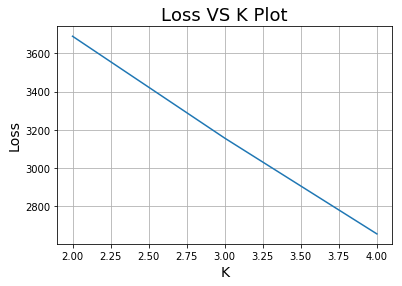

In [28]:
import matplotlib.pyplot as plt

plt.plot(k_values, loss)
plt.xlabel('K',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K Plot',size=18)
plt.grid()
plt.show()

In [29]:
#using best hyperparameter
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(body_tfidf)

C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [30]:
reviews = data['preprocessed_body'].values

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(reviews[i])
    elif kmeans.labels_[i] == 3:
        cluster4.append(reviews[i])

In [31]:
for i in range(3):
    print('%s\n'%(cluster2[i]))

not a fake at least not bottle i got i read ingredients back bottle compared ingredients actual dove website product identical not thing different this product actually helped soften clear skin my husband i ordering bottle year my con water gets inside bottle starts smell like mildew little i suggest keeping away showerhead sprays cabinet done using

i love product my husband somehow goes bottle body wash per week large size bottle i not change frequently for one bottle holds lot product two pump dispenses normal amount body wash minimizing amount husband uses the scent fairly neutral clean scent fine using product this means one less bottle product taking real estate shower as moisturizing i still need follow lotion skin definitely feels softer right shower

so i almost purchase item reviews reviews wrong i actually looked ingredients online official dove website ingredients dove i got amazonand also sold not another seller well maybe something happened guys order real dove i love



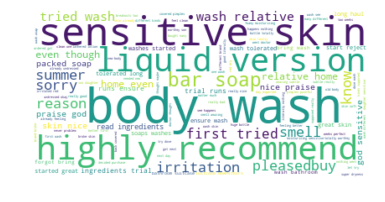

In [32]:
#cluster 1
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

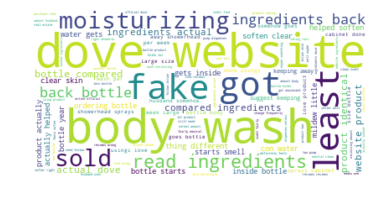

In [33]:
#cluster 2
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

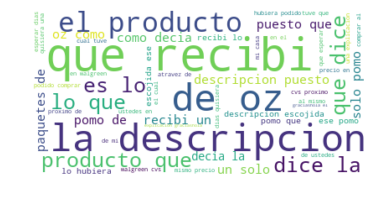

In [34]:
#cluster 3
words=''
for i in cluster3:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
print(wordcloud.words_.keys())

dict_keys(['que recibi', 'la descripcion', 'de oz', 'el producto', 'producto que', 'es lo', 'lo que', 'que dice', 'dice la', 'descripcion puesto', 'puesto que', 'recibi un', 'un solo', 'solo pomo', 'pomo de', 'paquetes de', 'oz como', 'como decia', 'decia la', 'descripcion escojida', 'escojida ese', 'ese pomo', 'pomo que', 'recibi lo', 'lo hubiera', 'hubiera podido', 'podido comprar', 'comprar al', 'al mismo', 'mismo precio', 'precio en', 'en walgreen', 'walgreen cvs', 'cvs proximo', 'proximo de', 'de mi', 'mi casa', 'atravez de', 'de ustedes', 'ustedes en', 'en el', 'el cual', 'cual tuve', 'tuve que', 'que esperar', 'esperar dias', 'dias quisiera', 'quisiera una', 'una explicacion', 'explicacion graciashola', 'graciashola el', 'hola', 'gracias'])


In [36]:
centers = kmeans.cluster_centers_

In [37]:
centers

array([[0.        , 0.        , 0.        , ..., 0.        , 0.03301785,
        0.02519034],
       [0.        , 0.04988017, 0.0744108 , ..., 0.03942071, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09372782, 0.        , 0.05160227, ..., 0.1221795 , 0.        ,
        0.        ]])

In [38]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer_body.get_feature_names()
for i in range(1,4,1):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 1: bottle
 product
 dove
 ingredients
 reviews
Cluster 2: que
 de
 recibi
 no
 pomo
Cluster 3: hate
 believe
 soo
 horrible
 ppl


# TFIDF Vectorizer :trigram keywords.

In [39]:
vectorizer_body = TfidfVectorizer(min_df=10,ngram_range = (3,3))
vectorizer_body.fit(data['preprocessed_body'].values)

body_tfidf_trigram = vectorizer_body.transform(data['preprocessed_body'].values)

print("Shape of matrix after body_tfidf ",body_tfidf_trigram.shape)

Shape of matrix after body_tfidf  (4990, 528)


In [40]:
#Words and score dataframe
Score_df_trigram = pd.DataFrame()
Score_df_trigram["Words"] = vectorizer_body.get_feature_names()
Score_df_trigram["Score"] = np.round(body_tfidf_trigram.toarray()[0],3)

In [41]:
Score_df_trigram

,Words,Score
0,absolutely not buying,0.000
1,actual dove website,0.000
2,actually helped soften,0.000
3,actually looked ingredients,0.000
4,actually trying sell,0.154
5,after completely dry,0.000
6,ago not turned,0.000
7,al mismo precio,0.000
8,almost purchase item,0.000
9,almost whole year,0.154


# Apply Kmeans on bigrams:

In [42]:
k_values = [2,3,4]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, n_jobs=-1,max_iter=1000).fit(body_tfidf)
    loss.append(kmeans.inertia_)#Inertia: Sum of distances of samples to their closest cluster center

C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


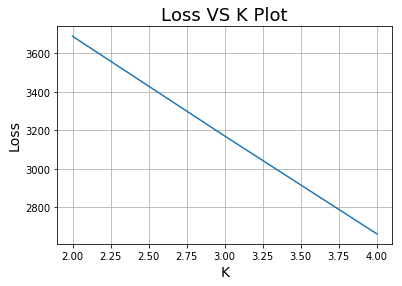

In [43]:
import matplotlib.pyplot as plt

plt.plot(k_values, loss)
plt.xlabel('K',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K Plot',size=18)
plt.grid()
plt.show()

In [44]:
#using best hyperparameter
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(body_tfidf)

C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [45]:
reviews = data['preprocessed_body'].values

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(reviews[i])
    elif kmeans.labels_[i] == 3:
        cluster4.append(reviews[i])

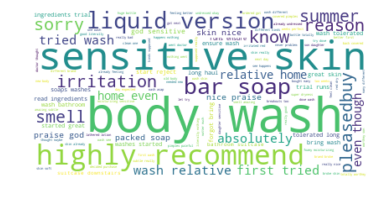

In [46]:
#cluster 1
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

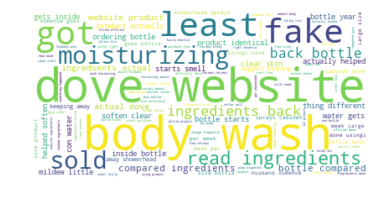

In [47]:
#cluster 2
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

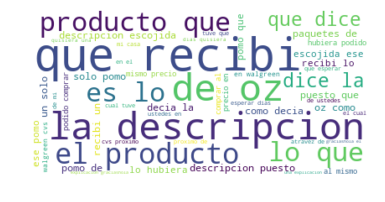

In [48]:
#cluster 3
words=''
for i in cluster3:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
print(wordcloud.words_.keys())

dict_keys(['que recibi', 'la descripcion', 'de oz', 'el producto', 'producto que', 'es lo', 'lo que', 'que dice', 'dice la', 'descripcion puesto', 'puesto que', 'recibi un', 'un solo', 'solo pomo', 'pomo de', 'paquetes de', 'oz como', 'como decia', 'decia la', 'descripcion escojida', 'escojida ese', 'ese pomo', 'pomo que', 'recibi lo', 'lo hubiera', 'hubiera podido', 'podido comprar', 'comprar al', 'al mismo', 'mismo precio', 'precio en', 'en walgreen', 'walgreen cvs', 'cvs proximo', 'proximo de', 'de mi', 'mi casa', 'atravez de', 'de ustedes', 'ustedes en', 'en el', 'el cual', 'cual tuve', 'tuve que', 'que esperar', 'esperar dias', 'dias quisiera', 'quisiera una', 'una explicacion', 'explicacion graciashola', 'graciashola el', 'hola', 'gracias'])


In [50]:
centers = kmeans.cluster_centers_

In [51]:
centers

array([[0.03749113, 0.        , 0.        , ..., 0.        , 0.02641428,
        0.02015228],
       [0.        , 0.04988017, 0.0744108 , ..., 0.03942071, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10320455, ..., 0.24435899, 0.        ,
        0.        ]])

In [52]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]# argsort will sort the indices.
terms = vectorizer_body.get_feature_names()
for i in range(1,4,1):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 1: bad dries skin
 last year almost
 cannot give better
 expected the smell
 lotion anymore cuz
Cluster 2: like ppl selling
 brand broke skin
 lo hubiera podido
 hola el producto
 item reviews reviews
Cluster 3: keeping away showerhead
 ensure wash tolerated
 prescription grade stuff
 back bottle compared
 gets inside bottle


### Steps to slove this assignment:<br>
<b>1) Install all necessary libraries.</b><br>
<b>2)Checks for duplicate rows.</b><br>
<b>3)Checks for null values.</b><br>
<b>4) Text Preprocessing:</b><br>
<b>5) decontracting the phrases.</b><br>
<b>6) emoji stripping.</b><br>
<b>7) data cleaning.</b><br>
<b>8) vectorize the text data using TF-IDF for unigram,bigram,trigram</b><br>
<b>9) since this is unsupervised type of problem we can apply some machine learning algorithm. here i used K-means clustering algorithm.</b><br>
<b>10) grouped the words with most similar words based on loss function optimaization of K-means algo.</b><br>
<b>11) plot the word_cloud for each cluster for visualization.</b><br>
<b>2) print top 5 key words from each cluster.</b><br>
    
    
         
